In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [6]:
# Lê arquivo e seleciona variáveis de interesse.

base = pd.read_csv('SINASC_RO_2019.csv')
base = base.loc[:, ['SEXO',
                    'PESO',
                    'GESTACAO',
                    'APGAR5']
               ]

In [7]:
# Verifica dados faltantes.

base.isna().sum()

SEXO           4
PESO           0
GESTACAO    1232
APGAR5       103
dtype: int64

In [8]:
# Retira dados faltantes de 'APGAR5' e 'SEXO'.

base.dropna(subset=['APGAR5'], inplace=True)
base.dropna(subset=['SEXO'], inplace=True)

In [9]:
# Substitui dados faltantes de 'GESTAÇÃO' por '9: ignorado'.

base['GESTACAO'].fillna(9, inplace=True)

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [11]:
# Cria 'APGAR5_CLASS' categorizando 'APGAR5' conforme OMS.

base.loc[ (base['APGAR5'] >= 0) & (base['APGAR5'] <= 3), 'APGAR5_CLASS' ] = 'asfixia grave'
base.loc[ (base['APGAR5'] >= 4) & (base['APGAR5'] <= 5), 'APGAR5_CLASS' ] = 'asfixia moderada'
base.loc[ (base['APGAR5'] >= 6) & (base['APGAR5'] <= 7), 'APGAR5_CLASS' ] = 'asfixia leve'
base.loc[ (base['APGAR5'] >= 8) & (base['APGAR5'] <= 10), 'APGAR5_CLASS' ] = 'normal'

base['APGAR5_CLASS'].value_counts()

normal              26461
asfixia leve          319
asfixia grave          73
asfixia moderada       68
Name: APGAR5_CLASS, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

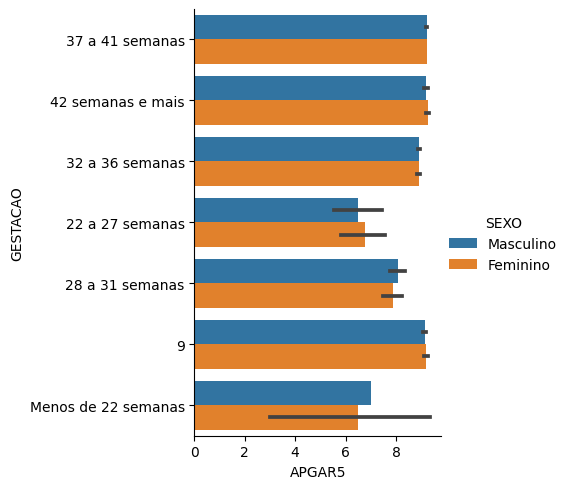

In [15]:
# A visulalização ficou melhor com as barras na horizontal.

sns.catplot(x='APGAR5'
            , y='GESTACAO'
            , hue = 'SEXO'
            , kind='bar'
            , data=base
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [18]:
gestacao_x_apgar5 = pd.crosstab(base['GESTACAO'],base['APGAR5'])
gestacao_x_apgar5

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
9,1,2,2,1,2,5,7,7,86,704,399
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,1,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,44,151,1417,13564,7283
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [20]:
freq_gestacao_x_apgar5 = gestacao_x_apgar5.div(gestacao_x_apgar5.sum(axis = 1), axis = 0)
freq_gestacao_x_apgar5

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
9,0.000822,0.001645,0.001645,0.000822,0.001645,0.004112,0.005757,0.005757,0.070724,0.578947,0.328125
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000896,0.000896,0.000448,0.000896,0.003583,0.004926,0.007613,0.025078,0.162114,0.585311,0.208240
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000933,0.001954,0.006705,0.062922,0.602309,0.323401
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

Sim, corrobora. A asfixia grave e leve tem maior frequência nos nascidos com menos de 37 semanas e essa frequência aumenta  conforme o tempo de gestação diminui.

<Axes: xlabel='GESTACAO'>

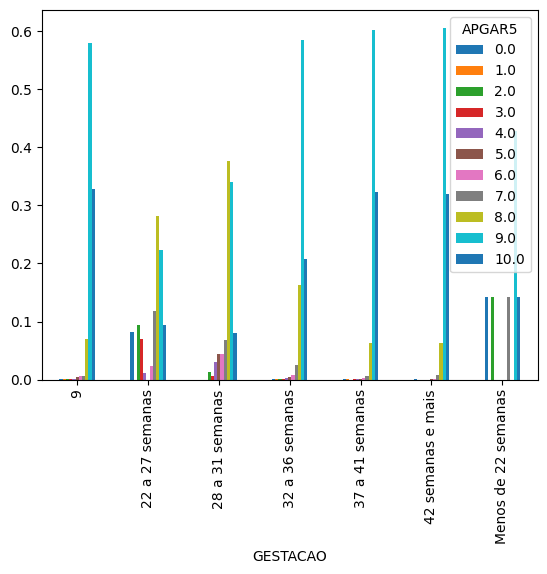

In [22]:
freq_gestacao_x_apgar5.plot.bar()

<Axes: xlabel='GESTACAO'>

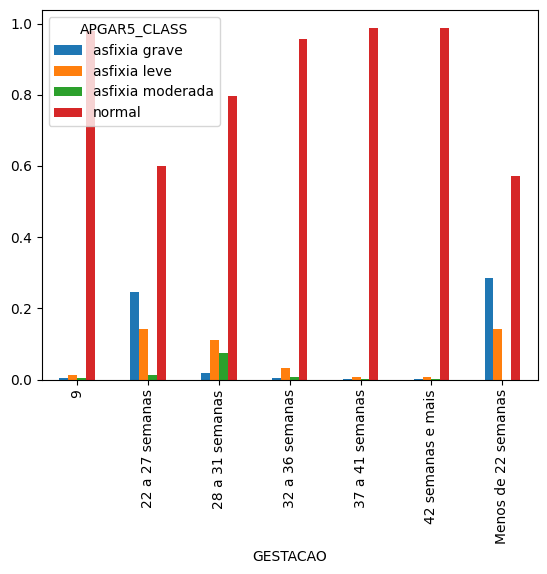

In [26]:
# Gráfico extra da frequência dos graus de asfixia por grupos de tempo de gestação. (Considerei a visualização mais clara.)

pd.crosstab(base['GESTACAO'],base['APGAR5_CLASS']).div(pd.crosstab(base['GESTACAO'],base['APGAR5_CLASS']).sum(axis = 1), axis = 0).plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Quando 'PESO' é relacionado com os valores individuais de 'APGAR5' é perceptível uma relação entre o baixo peso e baixos valores de apgar. Mas os valores onde 'APGAR5' = '1' confundem um pouco a visualização.

Quando 'PESO' é relacionado com os graus de asfixia dados pela classificação de 'APGAR5' conforme orientações da OMS fica mais claro essa relação entre o baixo peso ao nascer e o risco de asfixia.

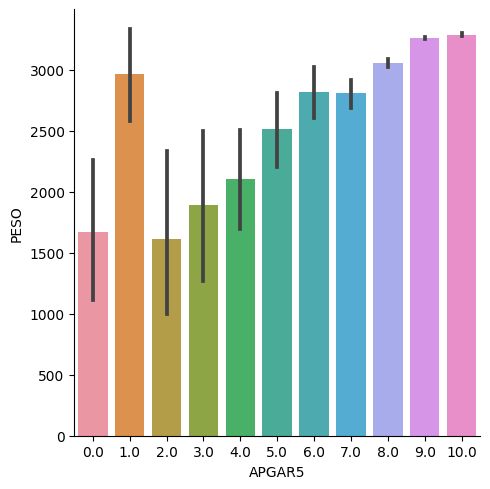

In [29]:
sns.catplot(x='APGAR5'
            , y='PESO'
            , kind='bar'
            , data=base
           )

<Axes: xlabel='APGAR5', ylabel='PESO'>

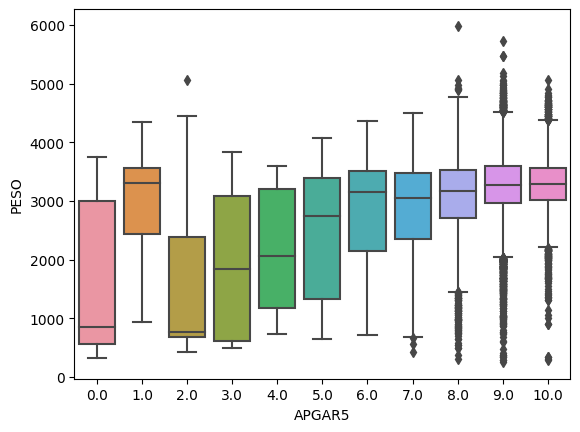

In [41]:
sns.boxplot(x='APGAR5', y='PESO', data=base)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'asfixia leve'),
  Text(2, 0, 'asfixia moderada'),
  Text(3, 0, 'asfixia grave')])

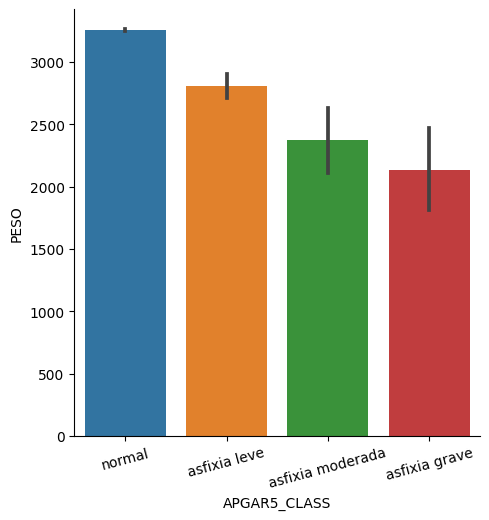

In [70]:
sns.catplot(x='APGAR5_CLASS'
            , y='PESO'
            , kind='bar'
            , data=base
            , order=['normal','asfixia leve','asfixia moderada','asfixia grave']
           )
plt.xticks(rotation=15)

<Axes: xlabel='APGAR5_CLASS', ylabel='PESO'>

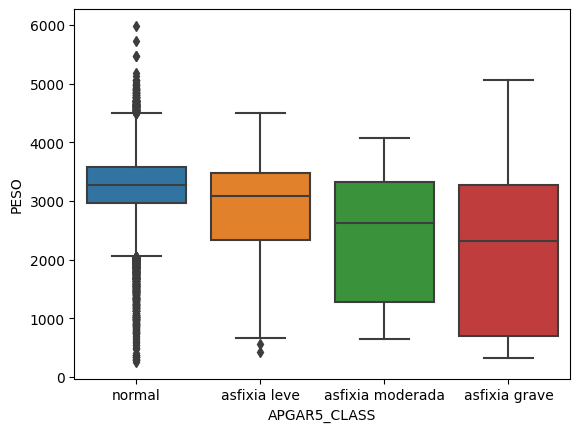

In [61]:
sns.boxplot(x='APGAR5_CLASS', y='PESO', data=base, order=['normal','asfixia leve','asfixia moderada','asfixia grave'])